In [8]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [10]:
import os
print (os.environ['PUI2015'])
#"HOME" in os.environ

/Users/mariaortiz/PUI2015_mortiz/


In [150]:
#imco = pd.read_csv(os.getenv('$PUI2015')+'/ExtraCredit/imcodata2.csv')
imco = pd.read_csv('/Users/mariaortiz/PUI2015_EC/meo342_EC/imcodata2.csv')
imco.columns


Index([u'ciudad', u'clave', u'estado',
       u'Tasa homicidios Por cada cien mil habitantes',
       u'Robo de mercancias: Pesos 2012 por cada millon de pesos de PIB',
       u'safetyperception', u'mtCO2e',
       u'Proporcion del area del municipio con acuiferos sobreexplotados',
       u'waterpc', u'cap tratamiento de agua l/s por cada 1,000 hab',
       u'indice, \rValores de 0-3, en funcion a si mide, publica datos y tiene un Proaire',
       u'goodtrash', u'Aprovecha biogas Si=1, No=0', u'fuelpergdp',
       u'rend academico �% de alumnos de educacion basica y media superior en niveles Bueno y Excelente en Matematicas de prueba ENLACE',
       u'accessgoodschools', u'mortalidad diabetes Por cada 10 mil habitantes',
       u'mort infantil Decesos de menores de un a�o por cada mil nacidos vivos',
       u'Por cada 10 mil habitantes', u'acceso inst salud % de la PEA',
       u'crec accesso salud Tasa de cambio (%) entre 2008 y 2012',
       u' crec pob calificada Tasa de cambio (%) 

In [12]:
#imco.describe()

In [13]:
#creating df for variables I want to look 
imcoenv = imco[['ciudad', 'mtCO2e', 'waterpc', 'goodtrash', 'fuelpergdp', 'citygrowth', 'popdensity', 'population']]

In [91]:
#making individual dfs
inf = imco['inf']
citygrowth = imco['citygrowth']
popden = imco['popdensity']
eleccons = imco['fuelpergdp']
waterpc = imco['waterpc']
pop = imco['population']
cityindex = imco['ciudad']
trash = imco['goodtrash']
co2 = imco['mtCO2e']
gdppc = imco['gdppc']

#nomalizing CO2 emissions, dropping nans
co2pcn = imco['mtCO2e']/imco['population']
co2pc = co2pcn[(~np.isnan(co2pcn))]

In [87]:
#viewing cell for sanity checks


In [16]:
pop.max()

20848057.69

#Exploratory phase

##Distributions to see what data looks like

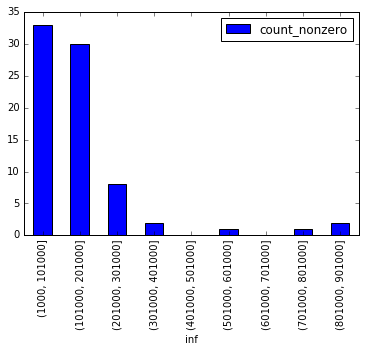

In [30]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(1000, 1000000, 100000)
inf.groupby(pd.cut(inf, bins)).agg([count_nonzero]).plot(kind='bar')

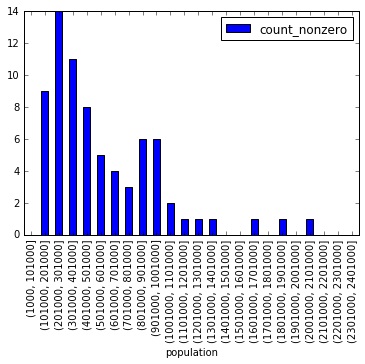

In [62]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(1000, 2500000, 100000)
pop.groupby(pd.cut(pop, bins)).agg([count_nonzero]).plot(kind='bar')

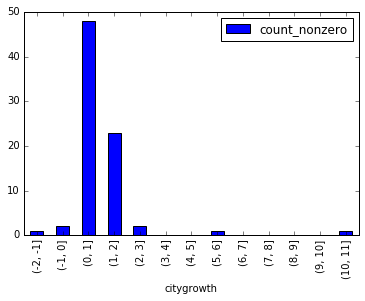

In [61]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(-2, 12, 1)
citygrowth.groupby(pd.cut(citygrowth, bins)).agg([count_nonzero]).plot(kind='bar')

In [47]:
waterpc.max()

732.0650882

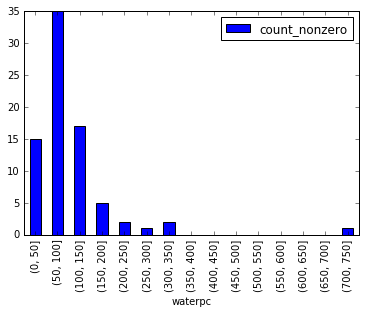

In [58]:
#water consumption
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 800, 50)
waterpc.groupby(pd.cut(waterpc, bins)).agg([count_nonzero]).plot(kind='bar')

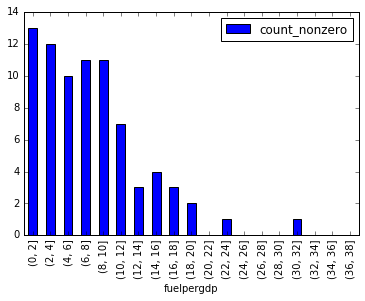

In [66]:
#electricty consumption
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 40, 2)
eleccons.groupby(pd.cut(eleccons, bins)).agg([count_nonzero]).plot(kind='bar')

In [68]:
co2.max()


31.0

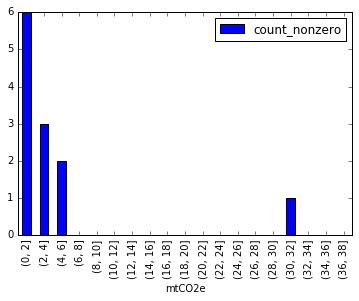

In [69]:
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 40, 2)
co2.groupby(pd.cut(co2, bins)).agg([count_nonzero]).plot(kind='bar')
#here we see the 31 million tons from DF

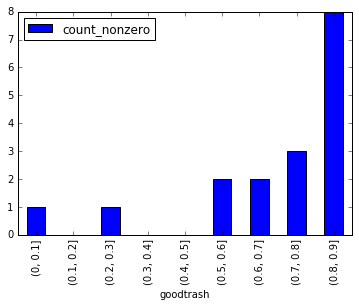

In [74]:
#adequate disposal of solid waste
fig = pl.figure(figsize=(10,10))
bins = np.arange(0, 1, .1)
trash.groupby(pd.cut(trash, bins)).agg([count_nonzero]).plot(kind='bar')

#Scatterplots - population

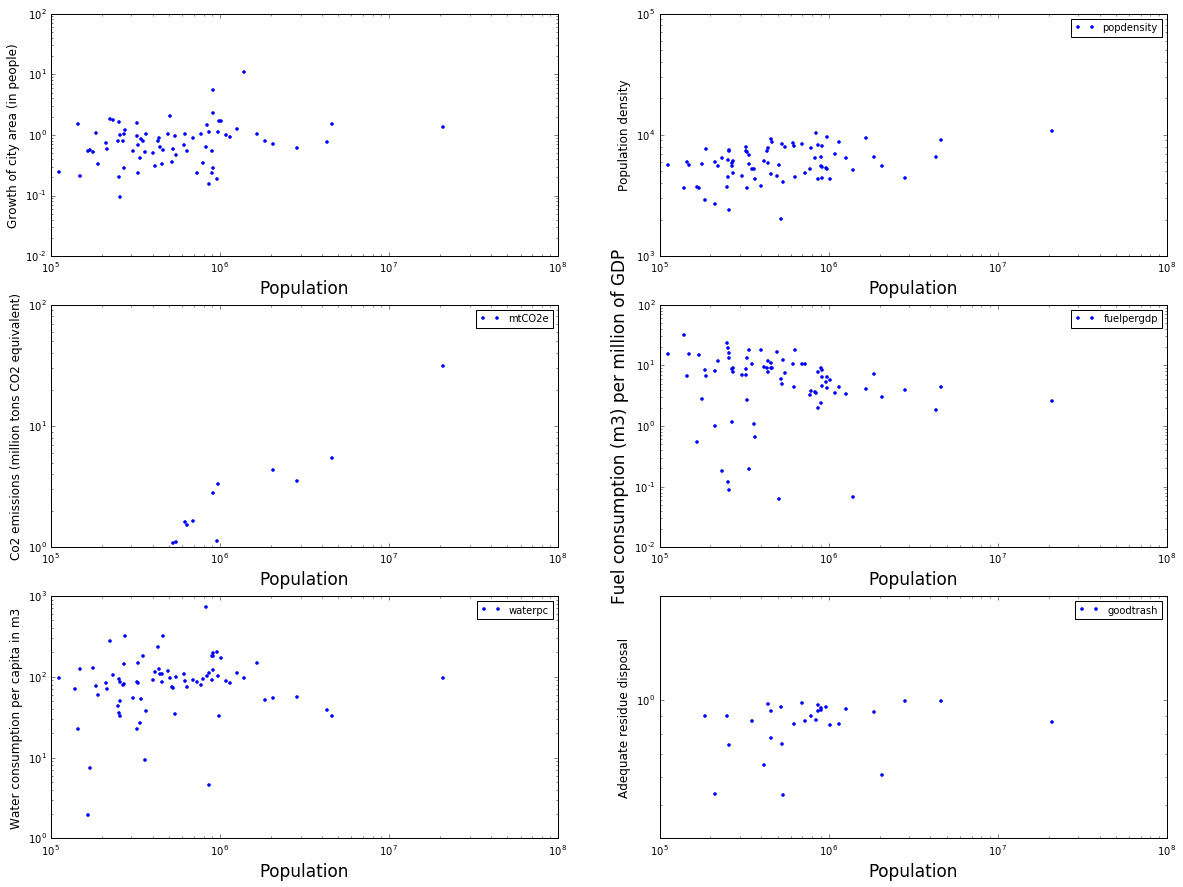

In [168]:
#looking at relationship with population
fig = pl.figure(figsize=(20,20))

pl.subplot(4,2,1)
pl.loglog(pop, citygrowth, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Growth of city area (in people)', fontsize=12)
#pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(4,2,2)
pl.loglog(pop, popden, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Population density', fontsize=12)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(4,2,3)
pl.loglog(pop, co2, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Co2 emissions (million tons CO2 equivalent)', fontsize=12)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(4,2,4)
pl.loglog(pop, eleccons, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Fuel consumption (m3) per million of GDP', fontsize=17)
pl.legend(loc = 0, fontsize = 10)


pl.subplot(4,2,5)
pl.loglog(pop, waterpc, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Water consumption per capita in m3', fontsize=12)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(4,2,6)
pl.loglog(pop[trash<1], trash[trash<1], '.')
pl.ylim(4e-1,2)
pl.xlabel('Population', fontsize=17)
pl.ylabel('Adequate residue disposal', fontsize=12)
pl.legend(loc = 0, fontsize = 10)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5190
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.473
Time:                        20:51:03   Log-Likelihood:                -134.38
No. Observations:                  78   AIC:                             272.8
Df Residuals:                      76   BIC:                             277.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9204      0.167      5.497      0.0

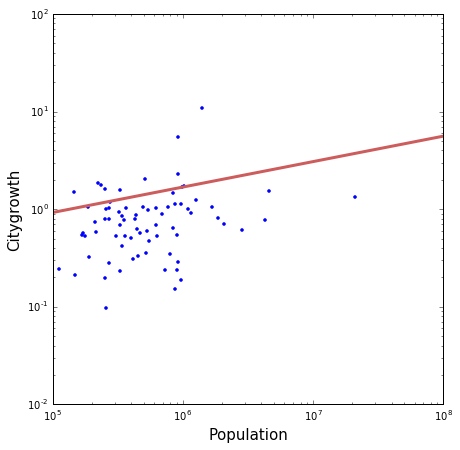

In [169]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot 
 
#Citygrowth
d = {'x': pop, 'y': citygrowth}
# Run regression and print summary
mod = smf.ols(formula='y ~ x', data = d).fit()
print(mod.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = citygrowth
x = pop
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Citygrowth', fontsize = 15)
pl.xlabel('Population', fontsize = 15)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.577
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.113
Time:                        20:51:13   Log-Likelihood:                -248.09
No. Observations:                  78   AIC:                             500.2
Df Residuals:                      76   BIC:                             504.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.0177      0.719     11.145      0.0

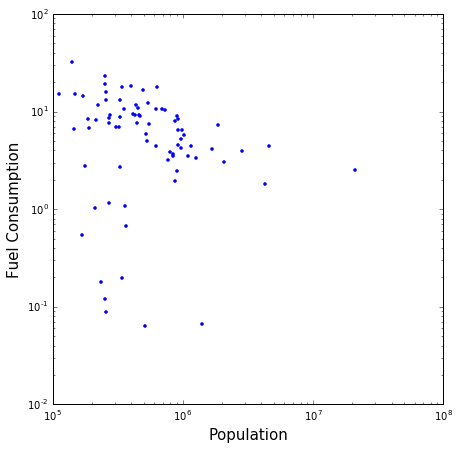

In [170]:
d = {'x': pop, 'y': eleccons}
# Run regression and print summary
mod2 = smf.ols(formula='y ~ x', data = d).fit()
print(mod2.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = eleccons
x = pop
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod2, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Fuel Consumption', fontsize = 15)
pl.xlabel('Population', fontsize = 15)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.06930
Date:                Tue, 15 Dec 2015   Prob (F-statistic):              0.793
Time:                        20:51:22   Log-Likelihood:                -465.89
No. Observations:                  78   AIC:                             935.8
Df Residuals:                      76   BIC:                             940.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    105.9838     11.739      9.028      0.0

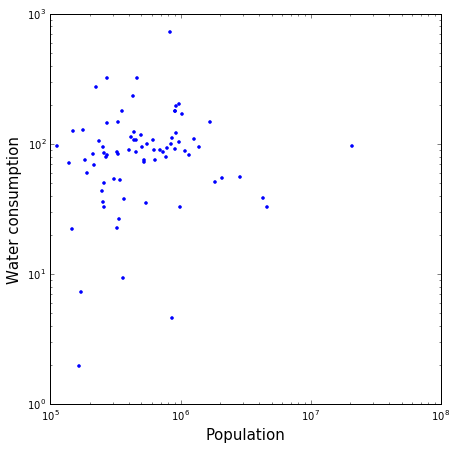

In [171]:
d = {'x': pop, 'y': waterpc}
# Run regression and print summary
mod3 = smf.ols(formula='y ~ x', data = d).fit()
print(mod3.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = waterpc
x = pop
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod3, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('Water consumption', fontsize = 15)
pl.xlabel('Population', fontsize = 15)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     881.8
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           4.38e-11
Time:                        20:51:50   Log-Likelihood:                -15.024
No. Observations:                  12   AIC:                             34.05
Df Residuals:                      10   BIC:                             35.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5181      0.305      1.697      0.1

/Users/mariaortiz/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  int(n))


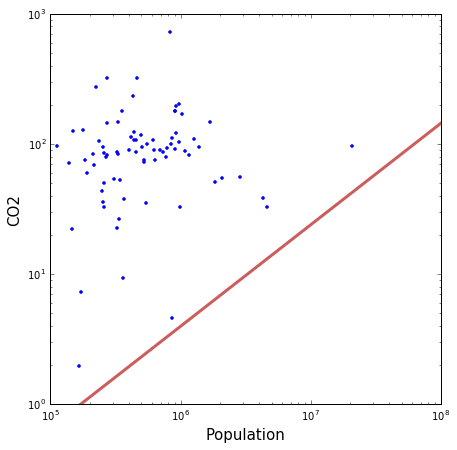

In [172]:
d = {'x': pop, 'y': co2}
# Run regression and print summary
mod4 = smf.ols(formula='y ~ x', data = d).fit()
print(mod4.summary())
figure, ax = pl.subplots(figsize=(7,7))
y = waterpc
x = pop
ax.loglog(x, y, '.')

# Plot regression line
abline_plot(model_results=mod4, color='IndianRed', ax=ax, lw = 3)

#ax.set_title('Linear Regression Line')
pl.ylabel('CO2', fontsize = 15)
pl.xlabel('Population', fontsize = 15)


In [18]:
#the column for mtCO2e has some nan values, so we remove them
#creating an index that shows where nan values are 
index = np.isnan(imcoenv.mtCO2e)
#resaving df with rows for where we have mtCO2e data 
final = imcoenv[index == 0]
final

,ciudad,mtCO2e,waterpc,goodtrash,fuelpergdp,citygrowth,popdensity,population
0,Aguascalientes,3.33,103.385094,1.000000,4.187821,1.117441,9562.758974,972704.1793
19,Valle de Mexico,31.00,95.939993,0.866844,2.543544,1.333303,10856.891050,20848057.6900
21,Celaya,1.61,89.350793,0.857107,4.446439,1.023992,8044.428113,623000.7126
23,Irapuato,1.11,99.282031,1.000000,7.418034,0.466669,8010.209477,550150.5493
34,Guadalajara,5.46,32.825935,0.994760,4.401677,1.528756,9128.080683,4614710.4160
37,Toluca,4.32,55.058674,0.608675,3.035340,0.700000,5499.108157,2074353.4870
42,Cuernavaca,1.13,203.300064,0.954138,5.248958,0.186698,5300.653295,962252.3736
45,Oaxaca,1.54,75.119816,0.010631,17.660090,0.537110,4523.197679,635210.7173
47,Puebla-Tlaxcala,3.55,56.156507,0.993844,3.900561,0.618987,4451.460824,2848670.6410
56,Culiacan,2.80,178.518826,1.000000,8.417036,0.289686,8130.089028,907938.5251


#Cluster Analysis

In [19]:
import scipy
import sklearn.cluster
#from sklearn import mixture
#from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2, vq, whiten, kmeans

In [145]:
final2 = final.set_index(['ciudad'])
cityname = final2.index.values
final2

,mtCO2e,waterpc,goodtrash,fuelpergdp,citygrowth,popdensity,population
ciudad,,,,,,,
Aguascalientes,3.33,103.385094,1.000000,4.187821,1.117441,9562.758974,972704.1793
Valle de Mexico,31.00,95.939993,0.866844,2.543544,1.333303,10856.891050,20848057.6900
Celaya,1.61,89.350793,0.857107,4.446439,1.023992,8044.428113,623000.7126
Irapuato,1.11,99.282031,1.000000,7.418034,0.466669,8010.209477,550150.5493
Guadalajara,5.46,32.825935,0.994760,4.401677,1.528756,9128.080683,4614710.4160
Toluca,4.32,55.058674,0.608675,3.035340,0.700000,5499.108157,2074353.4870
Cuernavaca,1.13,203.300064,0.954138,5.248958,0.186698,5300.653295,962252.3736
Oaxaca,1.54,75.119816,0.010631,17.660090,0.537110,4523.197679,635210.7173
Puebla-Tlaxcala,3.55,56.156507,0.993844,3.900561,0.618987,4451.460824,2848670.6410


In [226]:
#viewing cell
final2['mtCO2e'].min()

1.09

In [230]:
finalcluster = final2.values
(finalcluster).shape
#here we tak away population as it is has too strong of an influence on the clusters and was pushing them in one direction
(finalcluster[:,:6]).shape

(12, 6)

In [137]:
normcluster = finalcluster[:,:6] - finalcluster[:,:6].mean(axis=0).T
w = whiten(normcluster)
w.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [138]:
#clustering with k means, 2 clusters
final_2ck = scipy.cluster.vq.kmeans(w, 2, iter=1)
kmlabels2, kmdistances2 = vq(w, final_2ck[0])
print ("2 clusters labels")
print (kmlabels2)

2 clusters labels
[1 1 1 1 1 0 0 1 0 1 1 1]


In [139]:
finalcluster[0]

array([  3.33000000e+00,   1.03385094e+02,   1.00000000e+00,
         4.18782052e+00,   1.11744126e+00,   9.56275897e+03,
         9.72704179e+05])

In [140]:
fig = pl.figure(figsize=(20,20))

print (kmlabels2 == 0)
print ((finalcluster[kmlabels2 == 0]).shape)
print ((finalcluster[kmlabels2 == 1]).shape)

[False False False False False  True  True False  True False False False]
(3, 7)
(9, 7)


cluster 1:  ['Toluca' 'Cuernavaca' 'Puebla-Tlaxcala']
cluster 2:  ['Aguascalientes' 'Valle de Mexico' 'Celaya' 'Irapuato' 'Guadalajara'
 'Oaxaca' 'Culiacan' 'Xalapa' 'Poza Rica']


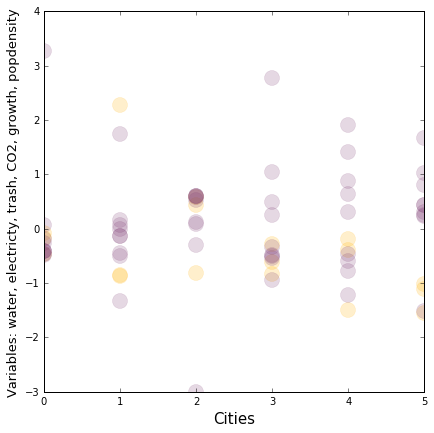

In [216]:
fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[kmlabels2 == l])):
        pl.plot(w[kmlabels2 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
pl.xlabel('Cities', fontsize = 15)
pl.ylabel('Variables: water, electricty, trash, CO2, growth, popdensity', fontsize = 13)
ax.set_title('test', fontsize = 12)
print ("cluster 1: ", cityname[kmlabels2 == 0])
print ("cluster 2: ", cityname[kmlabels2 == 1])

In [153]:
#clustering with k means, 3 clusters
final_3ck = scipy.cluster.vq.kmeans(w, 3, iter=1)
kmlabels3, kmdistances3 = vq(w, final_3ck[0])
print ("3 clusters labels")
print (kmlabels3)

3 clusters labels
[1 1 1 1 1 1 1 0 1 1 1 1]


In [156]:
fig = pl.figure(figsize=(20,20))

print (kmlabels3 == 0)
print ((finalcluster[kmlabels3 == 0]).shape)
print ((finalcluster[kmlabels3 == 1]).shape)

[False False False False  True  True False False  True False False False]
(3, 7)
(1, 7)


In [155]:
#clustering with k means, 3 clusters
#final_3ck = scipy.cluster.vq.kmeans(finalcluster, 3, iter=1)
#kmlabels3, kmdistances3 = vq(finalcluster, final_3ck[0])
#print ("3 clusters labels")
#print (kmlabels3)

cluster 1:  ['Guadalajara' 'Toluca' 'Puebla-Tlaxcala']
cluster 2:  ['Valle de Mexico']
cluster 3:  ['Aguascalientes' 'Celaya' 'Irapuato' 'Cuernavaca' 'Oaxaca' 'Culiacan'
 'Xalapa' 'Poza Rica']


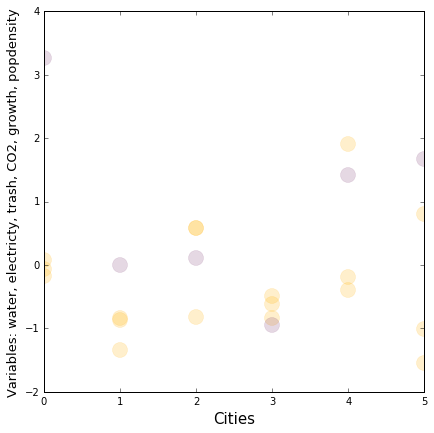

In [218]:
fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[kmlabels3 == l])):
        pl.plot(w[kmlabels3 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
#pl.plot(finalcluster[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
pl.xlabel('Cities', fontsize = 15)
pl.ylabel('Variables: water, electricty, trash, CO2, growth, popdensity', fontsize = 13)
#pl.suptitle('City Comparison')
print ("cluster 1: ", cityname[kmlabels3 == 0])
print ("cluster 2: ", cityname[kmlabels3 == 1])
print ("cluster 3: ", cityname[kmlabels3 == 2])

In [174]:
#finalcluster

In [179]:
from sklearn.cluster import AgglomerativeClustering

#Agglomerative Clustering

In [192]:
#Agglomerative clustering (2 clusters)
agc2 = AgglomerativeClustering(n_clusters=2,  compute_full_tree=True).fit(w)
labelsag2 = agc2.labels_

cluster 1:  ['Aguascalientes' 'Valle de Mexico' 'Celaya' 'Irapuato' 'Guadalajara'
 'Toluca' 'Cuernavaca' 'Puebla-Tlaxcala' 'Culiacan' 'Xalapa' 'Poza Rica']
cluster 2:  ['Oaxaca']


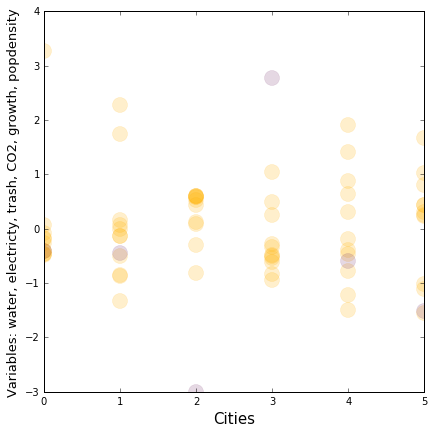

In [220]:
fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[labelsag2 == l])):
        pl.plot(w[labelsag2 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
#pl.plot(finalcluster[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
pl.xlabel('Cities', fontsize = 15)
pl.ylabel('Variables: water, electricty, trash, CO2, growth, popdensity', fontsize = 13)
#pl.suptitle('City Comparison')
print ("cluster 1: ", cityname[labelsag2 == 0])
print ("cluster 2: ", cityname[labelsag2 == 1])

In [227]:
import plotly.plotly as py
from plotly.graph_objs import *

In [228]:
py.iplot_mpl(fig)
#purple dot at the top is 'line 11'...

cluster 1:  ['Aguascalientes' 'Valle de Mexico' 'Celaya' 'Irapuato' 'Guadalajara'
 'Toluca' 'Cuernavaca' 'Puebla-Tlaxcala' 'Culiacan' 'Xalapa' 'Poza Rica']
cluster 2:  ['Oaxaca']
cluster 3:  ['Valle de Mexico']


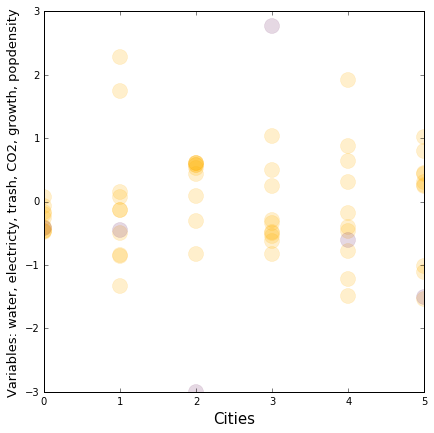

In [238]:
agc3 = AgglomerativeClustering(n_clusters=3,  compute_full_tree=True).fit(w)
labelsag3 = agc3.labels_

fig = pl.figure(figsize=(15,15))

pl.subplot(2,2,1)
for l in range(2):
    for j in range(len(w[labelsag3 == l])):
        pl.plot(w[labelsag3 == l][j], '.', ms = 30, 
                color = kelly_colors_hex[l], alpha = 0.2)
#pl.plot(finalcluster[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
pl.xlabel('Cities', fontsize = 15)
pl.ylabel('Variables: water, electricty, trash, CO2, growth, popdensity', fontsize = 13)
#pl.suptitle('City Comparison')
print ("cluster 1: ", cityname[labelsag2 == 0])
print ("cluster 2: ", cityname[labelsag2 == 1])
print ("cluster 3: ", cityname[labelsag3 == 2])